# Lab 6 - Mathematical Distributions

In [1]:
%matplotlib inline

This will make all the `matplotlib` images appear in the notebook.

## General Instructions

In this course, Labs are the chance to applying concepts and methods discussed in the module.
They are a low stakes (pass/fail) opportunity for you to try your hand at *doing*.
Please make sure you follow the general Lab instructions, described in the Syllabus.
The summary is:

* Discussions should start as students work through the material, first Wednesday at the start of the new Module week. 
* Labs are due by Sunday. 
* Lab solutions are released Monday.  
* Post Self Evaluation and Lab to Lab Group on Blackboard and Lab to Module on Blackboard on Monday.

The last part is important because the Problem Sets will require you to perform the same or similar tasks without guidance.
Problem Sets are your opportunity to demonstrate that you understand how to apply the concepts and methods discussed in the relevant Modules and Labs.

## Specific Instructions

1.  For Blackboard submissions, if there are no accompanying files, you should submit *only* your notebook and it should be named using *only* your JHED id: fsmith79.ipynb for example if your JHED id were "fsmith79". If the assignment requires additional files, you should name the *folder/directory* your JHED id and put all items in that folder/directory, ZIP it up (only ZIP...no other compression), and submit it to Blackboard.

    * do **not** use absolute paths in your notebooks. All resources should located in the same directory as the rest of your assignments.
    * the directory **must** be named your JHED id and **only** your JHED id.
    * do **not** return files provided by us (data files, .py files)


2. Data Science is as much about what you write (communicating) as the code you execute (researching). In many places, you will be required to execute code and discuss both the purpose and the result. Additionally, Data Science is about reproducibility and transparency. This includes good communication with your team and possibly with yourself. Therefore, you must show **all** work.

3. Avail yourself of the Markdown/Codecell nature of the notebook. If you don't know about Markdown, look it up. Your notebooks should not look like ransom notes. Don't make everything bold. Clearly indicate what question you are answering.

4. Submit a cleanly executed notebook. The first code cell should say `In [1]` and each successive code cell should increase by 1 throughout the notebook.

In [4]:
import numpy as np
import random as py_random
import numpy.random as np_random
import time
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import eda
from tabulate import tabulate
from pprint import pprint

sns.set(style="whitegrid")

## Problem 1

The following data are measurements (in millimeters) of rainbow trout caught in the Arolik River of Alaska.

1. Do EDA for the variable.
2. Create a mean model with error bounds using the more appropriate approach, and interpret the model.
3. What do you think the data generating story is?
4. Create a distributional model for the data and make three predictions with it.

In [3]:
trout = [572.4, 417.9, 423.3, 559.9, 459.0, 416.9, 534.4, 464.4, 476.3, 423.9, 466.0,
 437.0, 471.4, 486.2, 483.5, 470.0, 533.7, 419.5, 475.5, 485.8, 533.7, 529.5,
 464.6, 436.3, 448.0, 523.8, 457.2, 456.1, 458.0, 583.9, 455.7, 461.4, 482.9,
 505.5, 373.4, 372.3, 518.0, 472.6, 529.9, 536.3, 509.6, 475.3, 471.9, 477.1,
 488.5, 458.6, 543.6, 499.5]

We can see we have a list of data, and that this variable is a numeric variable. We can start our EDA by looking at some descriptive statistics.

In [16]:
stats = [['count', len(trout)], ['mean', np.mean(trout)], ['std', np.std(trout)], 
        ['min', np.min(trout)], ['25%', np.quantile(trout, 0.25)], 
        ['50%', np.quantile(trout, 0.50)], ['75%', np.quantile(trout, 0.75)],  
        ['max', np.max(trout)]]

tabulate(stats, headers=['Stat', 'Trout'], tablefmt='html',floatfmt='.1f')

Stat,Trout
count,48.0
mean,479.2
std,46.1
min,372.3
25%,456.9
50%,474.0
75%,511.7
max,583.9


We can see the same info that we would normally get with the describe method in pandas. We have a mean of 479.2 and a median of 474.0, so we expect this data to have a right skew. We can see that the min is 372.3 while max is 583.9, and note the 1st Quartile Range, 
456.9, is fairly close to the median of 474.0.

Now we can take a look at some charts. Since this is a numeric variable, we can look at a histogram first to visualize the distribution.

Text(0, 0.5, 'Counts')

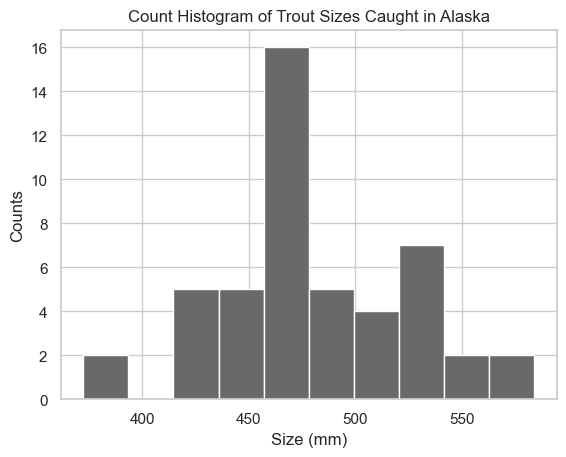

In [27]:

plt.hist(trout, color='dimgray')
plt.title('Count Histogram of Trout Sizes Caught in Alaska')
plt.xlabel('Size (mm)')
plt.ylabel('Counts')

We see that most trouts fall within the 425-550 range, roughly. There are a few low values, and I think changing the bin size to include more bins would help, so let's do that.

Text(0, 0.5, 'Counts')

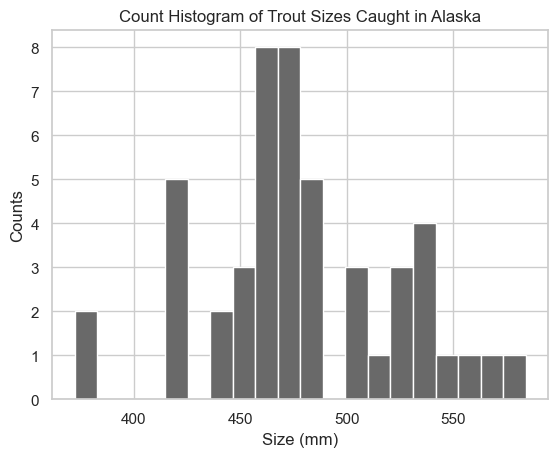

In [32]:
plt.hist(trout, color='dimgray', bins=20)
plt.title('Count Histogram of Trout Sizes Caught in Alaska')
plt.xlabel('Size (mm)')
plt.ylabel('Counts')

Here we can see that again we have the low values below 400mm, and a bit of a separation around 500mm. Next, let's look at a boxplot to get a better picture of the data. I'm expecting it to be consitent with the histograms.

Text(0.5, 0, 'Size (mm)')

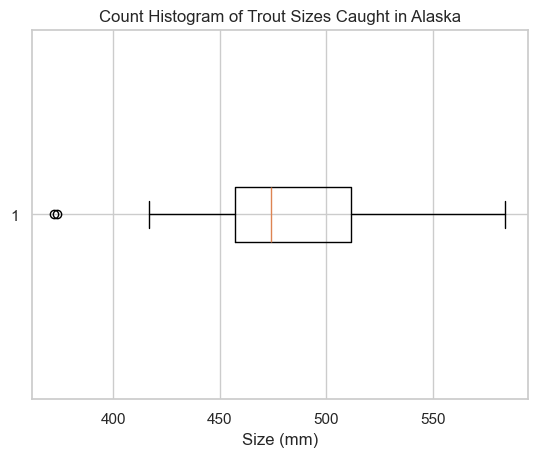

In [39]:
plt.boxplot(trout, vert=False)
plt.title('Count Histogram of Trout Sizes Caught in Alaska')
plt.xlabel('Size (mm)')


We see the expected result. There are some extreme values here and a right skew, and gives us a good idea of the interquartile range as well.

## Problem 2

The following data represent the number of days it takes a software team to clear tickets.

1. Do EDA for the variable.
2. Create a mean model with error bounds using the more appropriate approach, and interpret the model.
3. What do you think the data generating story is?
4. Create a distributional model for the data and make three predictions with it.

In [4]:
days = [8.0, 3.8, 4.0, 1.6, 2.6, 3.4, 8.7, 4.7, 6.1, 1.9, 6.0, 8.2, 2.7, 6.5, 1.9, 2.7,
 1.6, 1.3, 2.3, 3.3, 9.8, 8.3, 3.3, 4.3, 4.7, 7.2, 5.8, 3.3, 2.0, 3.2, 1.7, 2.5,
 1.6, 4.0, 4.1, 1.0, 2.7, 5.3, 7.6, 1.5, 7.1, 2.5, 2.6, 4.0, 1.3, 7.0, 4.0, 8.4,
 1.3, 5.1, 6.4, 3.1, 1.5, 4.1, 2.5, 5.5, 2.4, 1.4, 2.6, 1.9, 2.1, 2.0, 2.5, 2.2,
 2.6, 3.1, 3.6, 1.8, 3.1, 4.6, 1.2, 5.4, 6.5, 7.0, 9.7, 6.6, 9.1, 6.9, 2.5, 8.5,
 5.0, 3.2, 0.9, 3.3, 2.9, 3.9, 12.1, 3.4, 2.9, 4.6, 4.5, 1.7, 1.2, 3.6, 3.9,
 14.2, 5.3, 1.2, 0.3, 2.3, 2.9, 2.5, 0.8, 1.6, 2.7, 4.6, 4.4, 2.7, 3.5, 0.6,
 4.9, 2.2, 5.4, 6.0, 1.8, 1.0, 1.5, 4.0, 2.1, 5.6, 4.1, 1.9, 1.7, 3.8, 5.7, 4.1,
 2.3, 5.1, 8.4, 4.8, 3.7, 2.2, 2.6, 2.8, 0.5, 3.9, 2.9, 3.7, 2.6, 2.5, 11.7,
 3.3, 1.5, 7.3, 1.1, 0.3, 0.9, 0.5, 8.4, 2.8, 6.1, 3.4, 4.7, 10.0, 1.9, 5.8,
 6.4, 4.6, 0.4, 6.8, 5.3, 3.9, 1.2, 2.6, 3.4, 2.4, 3.7, 14.5, 10.3, 0.1, 0.8,
 0.4, 9.8, 6.3, 4.5, 1.0, 2.8, 5.6, 1.4, 1.7, 2.5, 1.7, 1.6, 23.0, 0.2, 3.1,
 1.5, 0.7, 2.4, 4.2, 3.0, 2.0, 8.3, 2.5, 4.4, 3.0, 5.2, 4.3, 4.7, 5.4, 1.1, 1.8,
 9.9, 2.9, 3.0, 5.8, 2.0, 0.6, 3.1, 8.2, 5.7, 4.7, 8.4, 4.1, 3.4, 2.7, 9.3, 0.6,
 0.5, 1.8, 8.4, 3.4, 10.9, 6.0, 11.3, 2.9, 1.9, 3.3, 1.7, 11.5, 6.9, 6.4, 7.4,
 2.4, 1.3, 0.7, 15.5, 4.2, 2.5, 2.0, 6.2, 3.7, 3.5, 5.3, 4.1, 2.6, 0.9, 3.1,
 1.5, 1.7, 1.8, 0.9, 0.7, 1.2, 5.0, 3.8, 3.7, 7.2, 4.0, 2.9, 16.4, 1.2, 6.8,
 0.5, 2.4, 7.7, 5.5, 4.6, 5.5, 0.3, 4.2, 5.1, 0.5, 7.0, 1.1, 0.6, 0.8, 2.2, 8.6,
 1.5, 2.8, 3.2, 7.4, 3.6, 7.9, 3.0, 3.4, 4.8, 1.9, 1.6, 0.7, 4.6, 4.3, 2.6, 7.4,
 0.1, 1.8, 6.7, 0.4, 2.0, 2.8, 2.4, 5.4, 1.2, 4.2, 3.8, 5.6, 3.0, 2.8, 5.4, 6.7,
 2.5, 3.4, 5.0, 3.7, 2.4, 3.6, 5.9, 1.9, 9.9, 4.0, 4.9, 1.9, 2.9, 3.9, 2.9, 5.5,
 8.1, 3.6, 2.1, 5.1, 11.1, 9.0, 1.8, 3.7, 1.0, 1.4, 3.9, 3.2, 0.9, 2.0, 4.5,
 2.5, 7.5, 2.5, 1.5, 0.6, 3.1, 6.0, 2.6, 1.9, 5.5, 8.7, 1.4, 2.9, 1.2, 8.1, 4.8,
 3.8, 0.6, 3.1, 6.5, 5.4, 6.3, 4.3, 7.1, 5.2, 3.7, 3.4, 1.9, 1.9, 1.0, 6.5, 2.8,
 3.6, 2.2, 3.8, 5.9, 4.6, 5.4, 2.9, 1.1, 9.5, 5.0, 13.2, 5.7, 2.2, 4.2, 3.8,
 1.4, 1.0, 2.0, 6.3, 1.8, 4.2, 1.8, 2.2, 12.4, 5.9, 5.3, 1.1, 5.6, 4.6, 2.4,
 5.4, 4.5, 0.9, 5.5, 13.9, 0.8, 3.1, 1.3, 5.7, 6.3, 2.5, 0.5, 10.1, 1.4, 1.5,
 3.8, 1.6, 4.7, 5.8]

## Problem 3

Following the pattern established in the previous two problems, build two models for BMI. 
(At this point, if we give you a variable and say "model it" you should know what we expect...).

In [5]:
insurance = pd.read_csv("https://raw.githubusercontent.com/fundamentals-of-data-science/datasets/master/insurance.csv", header=0)